<a href="https://colab.research.google.com/github/AkashK18/Credit-Card-Default-Prediction-ML-Classification/blob/main/Credit_Card_Default_Prediction_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Predicting whether a customer will default on his/her credit card**

**Problem Description**

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

**Data Description**

**Attribute Information:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:


*   X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.List item

*   X2: Gender (1 = male; 2 = female).

*   X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

*   X4: Marital status (1 = married; 2 = single; 3 = others).
*   X5: Age (year).


*   X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.


*   X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.


*   X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



# Initializing

In [76]:
# importing required libraries for data analysis
import pandas as pd
import numpy as np
from numpy import math

# impoerting libraries for dat visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/default of credit card clients.xls - Data.csv')

In [92]:
# Take a first of dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data Cleaning

In [79]:
#shape of data
df.shape

(30000, 25)

In [80]:
#basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [81]:
#summary of dataset
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [82]:
#check for na values in dataset
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [83]:
#check for null values in dataset
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [94]:
#check for any duplicates
len(df[df.duplicated()])

0



*   Dataset dose not contains any NA values, null values and duplicates.



# Data Description

In [95]:
#columns of dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [96]:
#shape of dataset
df.shape

(30000, 25)


 This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following variables as explanatory variables:


*   ID: Unique ID of each client

*   LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

*   Gender: 1 = male; 2 = female
*   Education: 1 = graduate school; 2 = university; 3 = high school; 4 = others


*   Marital status: 1 = married; 2 = single; 3 = others).


*   Age: Age in years







**History of past payment.**

We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.


*   PAY_0: Repayment status in September, 2005

*   PAY_2: Repayment status in August, 2005

*   PAY_3: Repayment status in July, 2005

*   PAY_4: Repayment status in June, 2005


*   PAY_5: Repayment status in May, 2005


*   PAY_6: Repayment status in April, 2005



**Amount of bill statement (NT dollar).**


*   BILL_AMT1: Amount of bill statement in September, 2005

*   BILL_AMT2: Amount of bill statement in August, 2005

*   BILL_AMT3: Amount of bill statement in July, 2005

*   BILL_AMT4: Amount of bill statement in June, 2005


*   BILL_AMT5: Amount of bill statement in May, 2005


*   BILL_AMT6: Amount of bill statement in April, 2005




**Amount of previous payment (NT dollar).** 



*   PAY_AMT1: Amount of previous payment in September, 2005
*   PAY_AMT2: Amount of previous payment in August, 2005


*   PAY_AMT3: Amount of previous payment in July, 2005

*   PAY_AMT4: Amount of previous payment in June, 2005
*   PAY_AMT5: Amount of previous payment in May, 2005


*   PAY_AMT6: Amount of previous payment in April, 2005


*   default.payment.next.month: Default payment (1=yes, 0=no)







# Data Preprocessing

Changing name of some columns for simplicity and better understanding

In [97]:
#renaming of columns
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [98]:
#check for columns name
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [110]:
#replacing values with there labels
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [111]:
#check for replaced labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


# Exploratory Data Analysis

IsDefaulter

<AxesSubplot:xlabel='IsDefaulter', ylabel='count'>

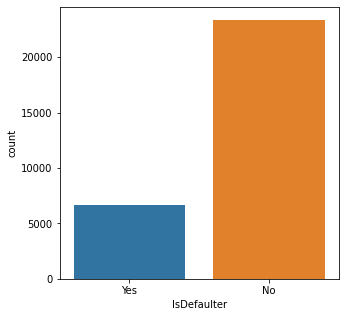

In [112]:
#values count plot of IsDefaulter
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df)



*   Both classes are not in proportion that is we have imbalanced dataset.



<AxesSubplot:xlabel='SEX', ylabel='count'>

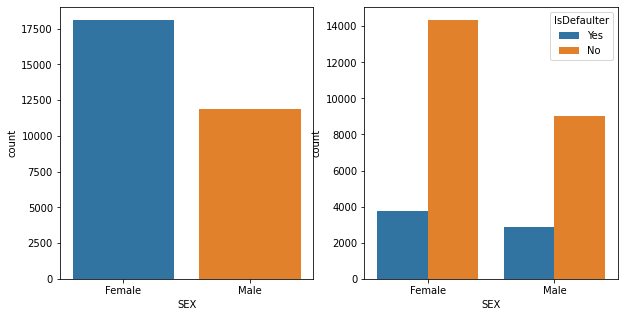

In [113]:
#count plot for sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter', ax = axes[1], data = df)

**EDUCATION**

In [114]:
#category wise values
df['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
Others               468
Name: EDUCATION, dtype: int64



*   In education column, values such as 5,6 and 0 are unknown. Lets combine those values as others.



In [115]:
#replace values with 5, 6 and 0 to others
df.EDUCATION = df.EDUCATION.replace({5: "Others", 6: "Others", 0: "Others"})

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

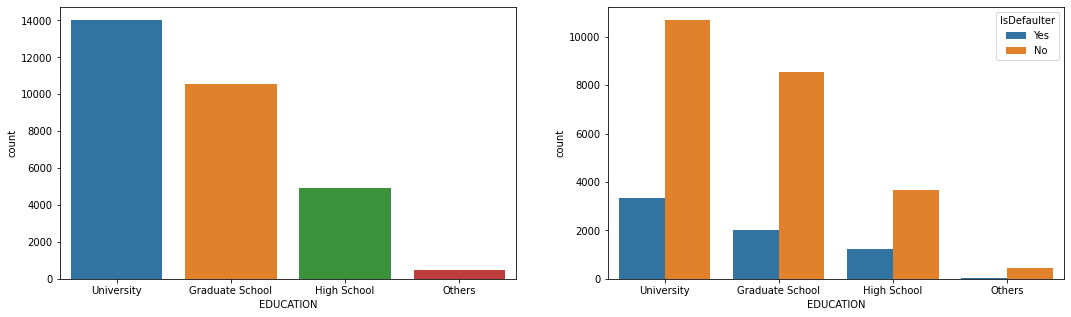

In [116]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2, figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter', ax = axes[1], data = df)

**MARRIAGE**

In [117]:
#Category wise values
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64



*   In marriage column, 0 values are not known. Combine those values in others category.



In [118]:
#replace 0 with others
df.MARRIAGE = df.MARRIAGE.replace({0: "Others"})

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

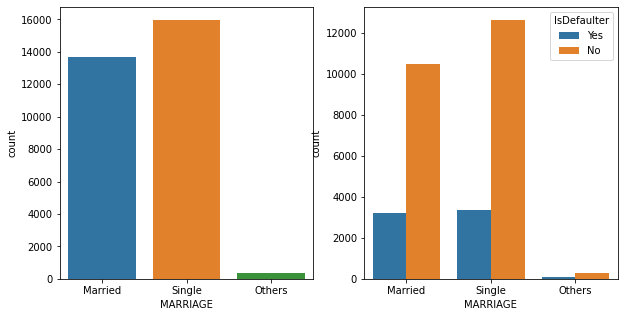

In [119]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter', ax = axes[1], data = df)

**AGE**

In [120]:
#age wise values of credit card holder
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='count'>

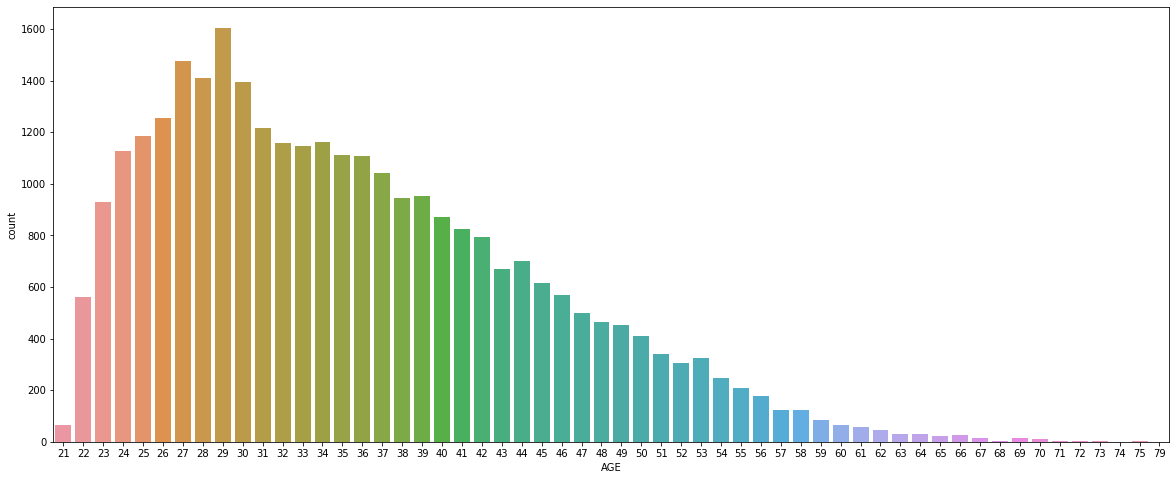

In [121]:
#values count for AGE
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

<AxesSubplot:xlabel='AGE', ylabel='count'>

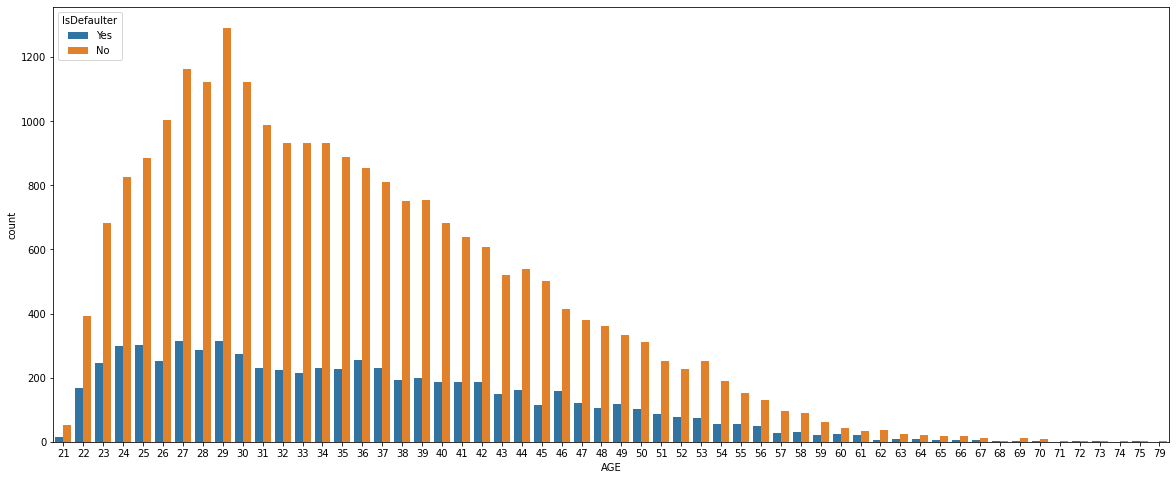

In [122]:
#values count for age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

***Label Encoding***

In [123]:
#label encoding
encoders_nums = {"SEX":{"Female":0, "Male":1}, "IsDefaulter": {"Yes":1, "No":0}}

df = df.replace(encoders_nums)

In [124]:
#check for changed labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,0,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**One Hot Encoding**

In [125]:
#Creating dummy variables
df = pd.get_dummies(df, columns = ['EDUCATION', 'MARRIAGE'])

In [126]:
df.shape

(30000, 30)

In [127]:
df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)

In [128]:
df.shape

(30000, 28)

In [129]:
#creating dummy variables by droping first variable
df = pd.get_dummies(df, columns =['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [130]:
df.shape

(30000, 80)

In [131]:
#check for all the created variables
df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,0,1,0,0,0,0,0,0,0


In [132]:
#shape of dataset after creating dummy variables
df.shape

(30000, 80)

# Handling Class Imbalance

SMOTE - Synthetic Minority Oversampling Technique